In [1]:
import pandas as pd
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [2]:
dane = pd.read_csv('data_BD_2020_04_03_cleaned.csv', encoding= 'unicode_escape', decimal=',')

Przetworzenie danych

In [3]:
col = ['yms', 'hamd',
       'context_no_day_incoming_calls', 'context_avg_day_duration_incoming',
       'context_stddev_duration_incoming', 'context_no_day_outgoing_calls',
       'context_avg_day_duration_outgoing', 'context_stddev_duration_outgoing',
       'context_no_nottakencalls', 'context_no_sms', 'context_avg_len_sms',
       'context_no_calls', 'context_prc_nottakencalls',
       'context_prc_out_calls', 'context_avg_duration_calls',
       'self_avg_sleep_time', 'self_avg_comment_len_sleep', 'self_avg_feeling',
       'self_avg_comment_len_mood', 'self_ismixed',
       'context_stddev_duration_calls', 'context_no_all_calls',
       'context_distance_nr', 'context_stepnbr']
for i in col:
    dane.loc[dane[i].isna(),i]=0
    dane[i]=dane[i].apply(lambda x: float(x))

zdefiniować i zilustrować zmienne lingwistyczne dla przykładowej
zmiennej, na przykład dla liczby połączeń wychodzących.

In [4]:
var_name = 'context_no_day_outgoing_calls'

In [5]:
def q(x):
    return d.quantile(x)

In [6]:
def plot_ling_var(var_name, value):
    d = dane[var_name]
    max_for_universe = np.max(d)
    min_for_universe = np.min(d)

    universe = np.arange(min_for_universe, max_for_universe + 0.1, 0.1)

    reg = ctrl.Consequent(universe, "hh")
    low = fuzz.trapmf(reg.universe, [d.quantile(0), d.quantile(0), d.quantile(0.3), d.quantile(0.5)])
    medium = fuzz.trapmf(reg.universe, [d.quantile(0.25), d.quantile(0.3), d.quantile(0.7), d.quantile(0.75)])
    high = fuzz.trapmf(reg.universe, [d.quantile(0.5), d.quantile(0.7), d.quantile(1), d.quantile(1)])

    plt.plot(universe, low)
    plt.plot(universe, medium)
    plt.plot(universe, high)
    plt.title('Zmienne lingwistyczne dla zmiennej '+var_name)
    
    print("stopień przynależności dla wartości zmiennej "+var_name+" = "+ str(value))
    print("low = ",fuzz.interp_membership(universe, low, value),", medium = ",
fuzz.interp_membership(universe, medium, value),",high = ",
fuzz.interp_membership(universe, high, value))
    

def plot_ling_var_res(var_name):
    d = dane[var_name]
    max_for_universe = np.max(d)
    min_for_universe = np.min(d)

    universe = np.arange(min_for_universe, max_for_universe + 0.1, 0.1)

    reg = ctrl.Consequent(universe, "hh")
    low = fuzz.trapmf(reg.universe, [d.quantile(0), d.quantile(0), d.quantile(0.3), d.quantile(0.5)])
    medium = fuzz.trapmf(reg.universe, [d.quantile(0.25), d.quantile(0.3), d.quantile(0.7), d.quantile(0.75)])
    high = fuzz.trapmf(reg.universe, [d.quantile(0.5), d.quantile(0.7), d.quantile(1), d.quantile(1)])
    
    results =  pd.DataFrame([d.apply(lambda x: fuzz.interp_membership(universe, low, x))
                        ,d.apply(lambda x: fuzz.interp_membership(universe, medium, x)),
                        d.apply(lambda x : fuzz.interp_membership(universe, high, x))]).transpose()
    results.columns = [var_name + "_"  + i for i in["low", "medium", "high"]]
    return results

stopień przynależności dla wartości zmiennej hamd = 3
low =  0.6666666666666666 , medium =  1.0 ,high =  0.0


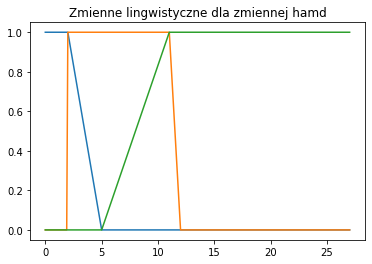

In [7]:
plot_ling_var("hamd",3)

stopień przynależności dla wartości zmiennej context_no_day_outgoing_calls = 5
low =  0.0 , medium =  1.0 ,high =  0.3333333333333333


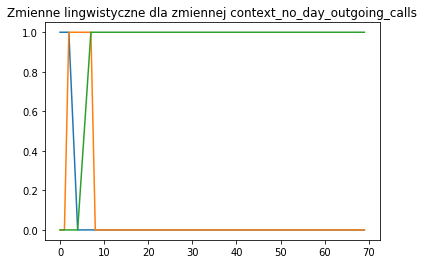

In [8]:
plot_ling_var("context_no_day_outgoing_calls",5)

In [9]:
dane.head()

,Unnamed: 0,patient_id,date,class,yms,hamd,context_no_day_incoming_calls,context_avg_day_duration_incoming,context_stddev_duration_incoming,context_no_day_outgoing_calls,...,context_avg_duration_calls,self_avg_sleep_time,self_avg_comment_len_sleep,self_avg_feeling,self_avg_comment_len_mood,self_ismixed,context_stddev_duration_calls,context_no_all_calls,context_distance_nr,context_stepnbr
0,1,108,2017-09-18,euthymia,0.0,6.0,11.0,486.363636,928.588097,29.0,...,220.450000,6.0,2.0,0.0,0.0,0.0,523.313504,45.0,6641.37,0.0
1,2,108,2017-09-19,euthymia,0.0,6.0,18.0,279.166667,380.911793,30.0,...,139.291667,6.0,0.0,0.0,0.0,0.0,267.217575,52.0,0.00,0.0
2,3,464,2017-10-03,depression,0.0,13.0,0.0,0.000000,0.000000,9.0,...,183.777778,0.0,0.0,0.0,0.0,0.0,177.349075,9.0,1284.36,0.0
3,4,464,2017-10-04,depression,0.0,13.0,3.0,367.333333,317.315826,7.0,...,274.100000,0.0,0.0,0.0,0.0,0.0,246.075169,10.0,24206.83,0.0
4,5,464,2017-10-05,depression,0.0,13.0,4.0,216.250000,265.392006,13.0,...,308.352941,0.0,0.0,0.0,0.0,0.0,435.885154,18.0,26337.44,0.0


LS1

In [10]:
def kwantyfikator(x):
    czesc = np.arange(0, 1.01, 0.01)
    wiekszosc = fuzz.trapmf(czesc, [0.50, 0.7, 1, 1])
    mniejszosc = fuzz.trapmf(czesc, [0, 0, 0.3, 0.50])
    prawie_wszystkie = fuzz.trapmf(czesc, [0.8, 0.9, 1, 1])
    czesc_wiekszosc = fuzz.interp_membership(czesc, wiekszosc, x)
    czesc_mniejszosc = fuzz.interp_membership(czesc, mniejszosc, x)
    czesc_prawie_wszystkie =  fuzz.interp_membership(czesc, prawie_wszystkie, x)
    return dict(wiekszosc = czesc_wiekszosc, 
                mniejszosc = czesc_mniejszosc, 
                prawie_wszystkie = czesc_prawie_wszystkie)
kwantyfikator(0.2)

{'wiekszosc': 0.0, 'mniejszosc': 1.0, 'prawie_wszystkie': 0.0}

In [11]:
kwantyfikatory = ['wiekszosc', 'mniejszosc', 'prawie_wszystkie']

podmioty = dane["class"].unique()

col = ['yms', 'hamd',
       'context_no_day_incoming_calls', 'context_avg_day_duration_incoming',
       'context_stddev_duration_incoming', 'context_no_day_outgoing_calls',
       'context_avg_day_duration_outgoing', 'context_stddev_duration_outgoing',
       'context_no_nottakencalls', 'context_no_sms', 'context_avg_len_sms',
       'context_no_calls', 'context_prc_nottakencalls',
       'context_prc_out_calls', 'context_avg_duration_calls',
       'self_avg_sleep_time', 'self_avg_comment_len_sleep', 'self_avg_feeling',
       'self_avg_comment_len_mood', 'self_ismixed',
       'context_stddev_duration_calls', 'context_no_all_calls',
       'context_distance_nr', 'context_stepnbr']


„generate_short_linguistic_summaries” (LS1), która jako
parametry wejściowe przyjmować będzie m.in.: (a) ramkę z przygotowanymi danymi;
(b) podmiot podsumowania (c) nazwę parametru dla którego generowane będą
podsumowania; (d) kwantyfikator lingwistyczny.
Dane wyjściowe: treść podsumowań, stopień prawdy, stopień pokrycia.

In [12]:
def generate_short_linguistic_summaries(dane, podmiot, var_name, kwant):
    def q(x):
        return d.quantile(x)
    d = dane[var_name]
    max_for_universe = np.max(d)
    min_for_universe = np.min(d)

    universe = np.arange(min_for_universe, max_for_universe + 0.1, 0.1)

    reg = ctrl.Consequent(universe, "hh")
    low = fuzz.trapmf(reg.universe, [q(0), q(0), q(0.3), q(0.5)])
    medium = fuzz.trapmf(reg.universe, [q(0.25), q(0.3), q(0.7), q(0.75)])
    high = fuzz.trapmf(reg.universe, [q(0.5), q(0.7), q(1), q(1)])
    
    data_filter = dane.loc[dane["class"]==podmiot,:] 
    
    d = data_filter[var_name]
    
    results =  pd.DataFrame([d.apply(lambda x: fuzz.interp_membership(universe, low, x))
                        ,d.apply(lambda x: fuzz.interp_membership(universe, medium, x)),
                        d.apply(lambda x : fuzz.interp_membership(universe, high, x))]).transpose()
    results.columns = [var_name + "_"  + i for i in["low", "medium", "high"]]
    
    res = pd.DataFrame()
    res['stopien prawdy'] =  np.mean(results, axis = 0).apply(lambda x: kwantyfikator(x)[kwant])
    res['stopien pokrycia'] = np.mean(results>0, axis = 0)
    if kwant == 'prawie_wszystkie':
        res.index = ['prawie wszyscy pacjenci w stanie ' + podmiot + 
                 ' charakteryzują się niską wartością zmiennej ' + var_name,
                     'prawie wszyscy pacjenci w stanie ' + podmiot + 
                 ' charakteryzują się średnią wartością zmiennej ' + var_name,
                     'prawie wszyscy pacjenci w stanie' + podmiot + 
                 ' charakteryzują się wysoką wartością zmiennej ' + var_name
                ]
    else:
            res.index = [kwant + ' pacjentow w stanie ' + podmiot + 
                 ' charakteryzuje się niską wartością zmiennej ' + var_name,
                         kwant + ' pacjentow w stanie ' + podmiot + 
                 ' charakteryzuje się średnią wartością zmiennej ' + var_name,
                         kwant + ' pacjentow w stanie ' + podmiot + 
                 ' charakteryzuje się wysoką wartością zmiennej ' + var_name,
                ]
    return res

LS2

In [13]:
def kwalifikator_hamd(x, stopien):
    d = dane["hamd"]
    max_for_universe = np.max(d)
    min_for_universe = np.min(d)
    universe = np.arange(min_for_universe, max_for_universe +1, 1)
    
    reg = ctrl.Consequent(universe, "hh")
    low = fuzz.trapmf(reg.universe, [0, 8, 10, 13])
    medium = fuzz.trapmf(reg.universe, [10, 13, 16,  max_for_universe])
    high = fuzz.trapmf(reg.universe, [16, 20, max_for_universe, max_for_universe])
   
    data_filter = dane.loc[dane["class"]=="depression",:]

    niskie_res = fuzz.interp_membership(universe, low, x)
    umiarkowane_res = fuzz.interp_membership(universe, medium, x)
    silne_res = fuzz.interp_membership(universe, high, x)
    
    results = dict(niskie = niskie_res, 
                umiarkowane = umiarkowane_res, 
                silne = silne_res)
    if stopien == 'niskie':
        return results["niskie"]
    elif stopien == "umiarkowane":
        return results["umiarkowane"]
    elif stopien == 'silne':
        return results['silne']

    

kwalifikator_hamd(22, 'umiarkowane')
# czy niski, umiarkowany, wysoki stopień depresji

0.45454545454545453

In [14]:
kwalifikator = ['niskie', 'umiarkowane', 'silne']# objawy depresji w sklai hamd
def generate_extended_linguistic_summaries(dane, podmiot ,kwalifikator, var_name, kwant, t_norm):
    def q(x):
        return d.quantile(x)
    d = dane[var_name]
    max_for_universe = np.max(d)
    min_for_universe = np.min(d)
    universe = np.arange(min_for_universe, max_for_universe + 0.1, 0.1)

    reg = ctrl.Consequent(universe, "hh")
    low = fuzz.trapmf(reg.universe, [q(0), q(0), q(0.3), q(0.5)])
    medium = fuzz.trapmf(reg.universe, [q(0.25), q(0.3), q(0.7), q(0.75)])
    high = fuzz.trapmf(reg.universe, [q(0.5), q(0.7), q(1), q(1)])
    
    data_filter = dane.loc[dane["class"]==podmiot,:] 
    
    
    d = data_filter[[var_name, "hamd"]]
    
    
    
    
    results =  pd.DataFrame([d["hamd"].apply(lambda x: kwalifikator_hamd(x, kwalifikator)),
                                            d[var_name].apply(lambda x: fuzz.interp_membership(universe, low, x))
                        ,d[var_name].apply(lambda x: fuzz.interp_membership(universe, medium, x)),
                        d[var_name].apply(lambda x : fuzz.interp_membership(universe, high, x))]).transpose()
    
    results.columns = [kwalifikator,var_name + '_' +"low", var_name + '_' +"medium", var_name + '_' +"high"]
    
    sum_kwalif = np.sum(results[kwalifikator])
    
    res = pd.DataFrame()
    t_norm_res= pd.DataFrame()
    if t_norm == "min":
        
        t_norm_res["low"]=np.min(results[[kwalifikator,var_name + '_' +"low"]],axis =1)
        t_norm_res["medium"]=np.min(results[[kwalifikator,var_name + '_' +"medium"]],axis =1)
        t_norm_res["high"] = np.min(results[[kwalifikator,var_name + '_' +"high"]],axis =1)
        res['stopien pokrycia'] = np.mean(pd.DataFrame({"low":np.min(results[[kwalifikator,var_name + '_' +"low"]]>0,axis =1),
        "medium":np.min(results[[kwalifikator,var_name + '_' +"medium"]]>0,axis =1),
        "high":np.min(results[[kwalifikator,var_name + '_' +"high"]]>0,axis =1)}), axis = 0)
        
    elif t_norm == "algb":
        t_norm_res["low"] = np.prod(results[[kwalifikator,var_name + '_' +"low"]], axis = 1)
        t_norm_res["medium"] = np.prod(results[[kwalifikator,var_name + '_' +"medium"]],axis =1)
        t_norm_res["high"]=np.prod(results[[kwalifikator,var_name + '_' +"high"]],axis =1)
        res['stopien pokrycia'] = np.mean(pd.DataFrame({"low":np.prod(results[[kwalifikator,var_name + '_' +"low"]]>0,axis =1),
        "medium":np.prod(results[[kwalifikator,var_name + '_' +"medium"]]>0,axis =1),
        "high":np.prod(results[[kwalifikator,var_name + '_' +"high"]]>0,axis =1)}), axis = 0)
    
    
    tmp = np.sum(t_norm_res, axis =0)/np.sum(results[kwalifikator])
    
    res["stopien prawdy"]=tmp.apply(lambda x: kwantyfikator(x)[kwant])
    
    res["stopien skupienia"] = np.mean(results[kwalifikator])

     
    if kwant == 'prawie_wszystkie':
        res.index = ['prawie wszyscy pacjenci w stanie manni, którzy mają ' + kwalifikator + 
                     ' nasilenie objawów'+
                 ' charakteryzują się niską wartością zmiennej ' + var_name,
                     'prawie wszyscy pacjenci w stanie manni, którzy mają ' + kwalifikator + 
                     ' nasilenie objawów'+
                 ' charakteryzują się średnią wartością zmiennej ' + var_name,
                     'prawie wszyscy pacjenci w stanie manni, którzy mają ' + kwalifikator +
                      
                     ' nasilenie objawów'+
                 ' charakteryzują się wysoką wartością zmiennej ' + var_name
                ]
    else:
            res.index = [kwant + ' pacjentow w stanie manni, którzy mają ' + kwalifikator + 
                          
                     ' nasilenie objawów'+
                 ' charakteryzuje się niską wartością zmiennej ' + var_name,
                         kwant + ' pacjentow w stanie manni, którzy mają ' + kwalifikator + 
                     ' nasilenie objawów'+ 
                 ' charakteryzuje się średnią wartością zmiennej ' + var_name,
                       kwant + ' pacjentow w stanie manni, którzy mają ' + kwalifikator + 
                     ' nasilenie objawów'+ 
                 ' charakteryzuje się wysoką wartością zmiennej ' + var_name,
                ]

    return res
    

   
generate_extended_linguistic_summaries(dane, podmiot = 'depression', kwalifikator = "niskie", 
                                       var_name ="context_no_sms", kwant = "mniejszosc", t_norm = "algb")    

,stopien pokrycia,stopien prawdy,stopien skupienia
"mniejszosc pacjentow w stanie manni, którzy mają niskie nasilenie objawów charakteryzuje się niską wartością zmiennej context_no_sms",0.192440,0.552326,0.295533
"mniejszosc pacjentow w stanie manni, którzy mają niskie nasilenie objawów charakteryzuje się średnią wartością zmiennej context_no_sms",0.302405,0.000000,0.295533
"mniejszosc pacjentow w stanie manni, którzy mają niskie nasilenie objawów charakteryzuje się wysoką wartością zmiennej context_no_sms",0.161512,0.968992,0.295533


In [15]:
generate_short_linguistic_summaries(dane, 'mixed', "yms", 'wiekszosc')

,stopien prawdy,stopien pokrycia
wiekszosc pacjentow w stanie mixed charakteryzuje się niską wartością zmiennej yms,0.0,0.009804
wiekszosc pacjentow w stanie mixed charakteryzuje się średnią wartością zmiennej yms,0.0,0.009804
wiekszosc pacjentow w stanie mixed charakteryzuje się wysoką wartością zmiennej yms,1.0,0.990196


## ZADANIE 6 - czesc do LS1

In [16]:
choosen_col = ["context_no_all_calls", "context_no_day_incoming_calls", "context_avg_day_duration_incoming"
               ,"context_no_day_outgoing_calls", "context_avg_duration_calls", "context_distance_nr",
               "context_stddev_duration_incoming","yms", "context_stddev_duration_calls",'self_avg_feeling']

df = generate_short_linguistic_summaries(dane, podmioty[0], choosen_col[0], kwantyfikatory[0])

for i in kwantyfikatory:
     for j in podmioty:
        for k in choosen_col[1:]:
             df = pd.concat([df, generate_short_linguistic_summaries(dane, j, k, i)], axis = 0)
            

# CZĘSĆ DO LS2

In [17]:
choosen_col = ["context_no_all_calls", "context_no_day_incoming_calls", "context_avg_day_duration_incoming"
               ,"context_no_day_outgoing_calls", "context_avg_duration_calls", "context_distance_nr",
               "context_stddev_duration_incoming","yms", "context_stddev_duration_calls",'self_avg_feeling']
for i in kwantyfikatory:
    for j in kwalifikator:
        for k in choosen_col:
            df = pd.concat([df, generate_extended_linguistic_summaries(dane, 'depression', j ,k, i,"min")], axis = 0)
             


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [18]:
df

,stopien pokrycia,stopien prawdy,stopien skupienia
wiekszosc pacjentow w stanie euthymia charakteryzuje się niską wartością zmiennej context_no_all_calls,0.427686,0.000000,NaN
wiekszosc pacjentow w stanie euthymia charakteryzuje się średnią wartością zmiennej context_no_all_calls,0.452479,0.000000,NaN
wiekszosc pacjentow w stanie euthymia charakteryzuje się wysoką wartością zmiennej context_no_all_calls,0.506198,0.000000,NaN
wiekszosc pacjentow w stanie euthymia charakteryzuje się niską wartością zmiennej context_no_day_incoming_calls,0.394628,0.000000,NaN
wiekszosc pacjentow w stanie euthymia charakteryzuje się średnią wartością zmiennej context_no_day_incoming_calls,0.514463,0.072314,NaN
...,...,...,...
"prawie wszyscy pacjenci w stanie manni, którzy mają silne nasilenie objawów charakteryzują się średnią wartością zmiennej context_stddev_duration_calls",0.113402,0.000000,0.237973
"prawie wszyscy pacjenci w stanie manni, którzy mają silne nasilenie objawów charakteryzują się wysoką wartością zmiennej context_stddev_duration_calls",0.154639,0.000000,0.237973
"prawie wszyscy pacjenci w stanie manni, którzy mają silne nasilenie objawów charakteryzują się niską wartością zmiennej self_avg_feeling",0.302405,0.000000,0.237973
"prawie wszyscy pacjenci w stanie manni, którzy mają silne nasilenie objawów charakteryzują się średnią wartością zmiennej self_avg_feeling",0.000000,0.000000,0.237973


In [23]:
df.sort_values(by="stopien prawdy", ascending = False).head(100).to_csv("results_group5.csv", index=False)